# **Some Information about Data**

- This is the dataset about Electric vehicles. We take different features about each electric vehicles.  that includes 

- We will find some interestign insights about this data 

# Some basic questions about Electric cars, we will try to address them.

-	Which car has the fastest acceleration? (less time for top speed)

-	Which has the highest efficiency? Efficiency = Range(km)/battery (kWh)

-	Which Company provides best car w.r.t Efficiency, Range, Top speed and Battery Power ??

-	Does a difference in power train effect the range, top speed, efficiency?

-	Which manufacturer has the most number of vehicles? 

-	How does price relate to rapid charging? 

-	Top speed and efficiency relationship, Pearson coefficient, 

-	Suggest Electric car to consumer on the basis of budget. 



In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
ev = pd.read_csv('Cheapestelectriccars-EVDatabase.csv')
ev.head()


,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


## Data Shape

In [151]:
print("Number of rows:", ev.shape[0])
print("Number of columns:", ev.shape[1])

Number of rows: 180
Number of columns: 11


In [152]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


# **Data Cleaning**
### 1- Replacing Null Values
### 2- Remove euro sign and comma from prices and change it in int type
### 3- Remove units of Numerical variables (Range, Efficiency, TopSpeed, Battery, Fast ChargeSpeed) and convert them in integer type so we do analysis further 
### 4- Rearranging Columns

In [153]:
ev.fillna(0, inplace=True)

In [154]:
ev.dtypes

Name               object
Subtitle           object
Acceleration       object
TopSpeed           object
Range              object
Efficiency         object
FastChargeSpeed    object
Drive              object
NumberofSeats       int64
PriceinGermany     object
PriceinUK          object
dtype: object

In [306]:
ev.columns

Index(['Name', 'Battery(KWH)', 'Acceleration', 'TopSpeed', 'Range',
       'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats',
       'PriceinGermany', 'PriceinUK', 'Company', 'Model'],
      dtype='object')

# **Numerical Variables**

In [155]:
ev['PriceinUK'] = ev['PriceinUK'].replace({'£': '', ',': ''}, regex=True)
ev['PriceinUK'] = ev['PriceinUK'].astype(float)
ev['PriceinGermany'] = ev['PriceinGermany'].replace({'€': '', ',': ''}, regex=True)
ev['PriceinGermany'] = ev['PriceinGermany'].astype(float)


In [156]:
# ev.astype({'PriceinUk': 'int64'}).dtypes
# ev.columns
# ev.astype({'PriceinUk': 'int64'}).dtypes

In [157]:
# PriceinUK=[]
# for item in ev['PriceinUK']:
#     PriceinUK+=[int(item.replace('£','').replace(',',''))]
# ev['PriceinUK']=PriceinUK

In [158]:
# ev['PriceinUK']=ev['PriceinUk'].str.replace('€','').str.replace(',','').astype(float)

In [159]:
ev.corr()

,NumberofSeats,PriceinGermany,PriceinUK
NumberofSeats,1.000000,-0.012455,-0.211985
PriceinGermany,-0.012455,1.000000,0.698753
PriceinUK,-0.211985,0.698753,1.000000


In [160]:
FastChargeSpeed=[]
for item in ev['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
ev['FastChargeSpeed']=FastChargeSpeed

In [161]:
Efficiency=[]
for item in ev['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
ev['Efficiency']=Efficiency

In [162]:
Range=[]
for item in ev['Range']:
    Range+=[int(item.replace(' km',''))]
ev['Range']=Range


In [163]:
TopSpeed=[]
for item in ev['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]   
ev['TopSpeed']=TopSpeed

In [164]:
Acceleration=[]
for item in ev['Acceleration']:
    Acceleration+=[float(item.replace('sec',''))]
ev['Acceleration']=Acceleration


In [165]:
Subtitle=[]
for item in ev['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace('kWh',''))]
ev['Subtitle']=Subtitle

In [166]:
ev = ev.rename(columns={'Subtitle': 'Battery(KWH)'})


In [167]:
ev_clean=ev


In [168]:
ev_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   Battery(KWH)     180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    float64
 10  PriceinUK        180 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 15.6+ KB


In [169]:
ev_clean[["Company", "Model"]] = ev_clean.Name.str.split(' ', n=1, expand=True)


In [170]:
ev_clean.head()

,Name,Battery(KWH),Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Company,Model
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990.0,0.0,Opel,Ampera-e
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0.0,31680.0,Renault,Kangoo Maxi ZE 33
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990.0,25995.0,Nissan,Leaf
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0.0,79900.0,Audi,e-tron Sportback 55 quattro
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336.0,138830.0,Porsche,Taycan Turbo S


In [145]:
# ev_clean.insert(1, 'Company', 'Company' )
# ev.pop('Company')

## Rearranging Columns

In [171]:
# ev= ev[ ['Compnay'] + [ col for col in ev.columns if col != 'Company' ]] // dont work
new_cols = ["Company","Model","Battery(KWH)","Acceleration","TopSpeed","Range","Efficiency","FastChargeSpeed","Drive","NumberofSeats","PriceinGermany","PriceinUK","Name"]
ev_clean = ev_clean[new_cols]

In [172]:
ev_clean.drop(['Name'], axis=1, inplace=True)
ev_clean


C:\Users\hp\AppData\Local\Temp\ipykernel_6460\2213530372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_clean.drop(['Name'], axis=1, inplace=True)


,Company,Model,Battery(KWH),Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990.0,0.0
1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0.0,31680.0
2,Nissan,Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990.0,25995.0
3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0.0,79900.0
4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336.0,138830.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,MG,Marvel R,65.0,7.9,200,340,191,390,Rear Wheel Drive,5,40000.0,0.0
176,Tesla,Model 3 Long Range Dual Motor,76.0,4.4,233,490,155,820,All Wheel Drive,5,53560.0,0.0
177,MG,MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,0.0,26495.0
178,Audi,Q4 e-tron 45 quattro,76.6,6.9,180,385,199,470,All Wheel Drive,5,50900.0,0.0


# **Data Insights**
### 1. Correlation and heatmap of every variable
### 2. First we will check relation of Battery KWH with every feature 
### 3. We will check relation between Categorical variable like Range, Top Speed, Efficiency, Battery power
### 4. We will check relationship among 3 variables, categorical and numerical variable


In [ ]:
ev_clean.corr()

,Battery(KWH),Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats
Battery(KWH),1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000


<AxesSubplot:>

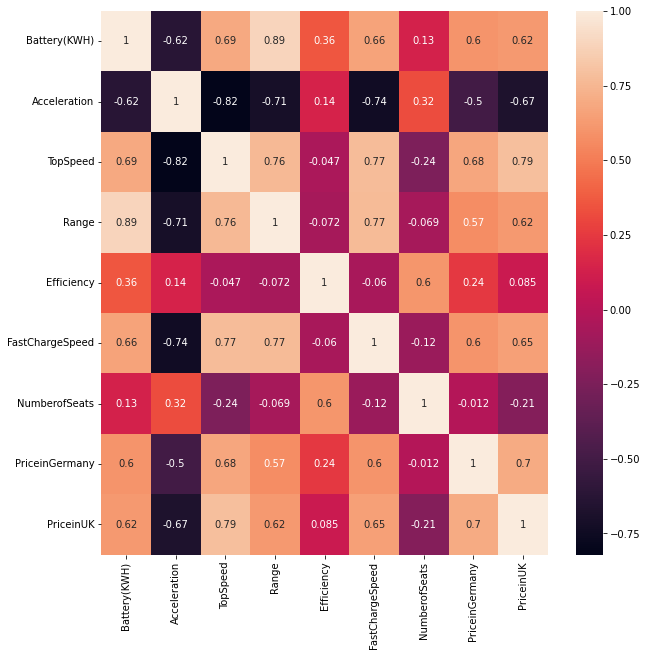

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(ev_clean.corr(), annot=True)

In [173]:
ev_clean

,Company,Model,Battery(KWH),Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990.0,0.0
1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0.0,31680.0
2,Nissan,Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990.0,25995.0
3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0.0,79900.0
4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336.0,138830.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,MG,Marvel R,65.0,7.9,200,340,191,390,Rear Wheel Drive,5,40000.0,0.0
176,Tesla,Model 3 Long Range Dual Motor,76.0,4.4,233,490,155,820,All Wheel Drive,5,53560.0,0.0
177,MG,MG5 EV Long Range,57.0,7.7,185,340,168,340,Front Wheel Drive,5,0.0,26495.0
178,Audi,Q4 e-tron 45 quattro,76.6,6.9,180,385,199,470,All Wheel Drive,5,50900.0,0.0


# Total Models of Every Company

Total Models of every compnay


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


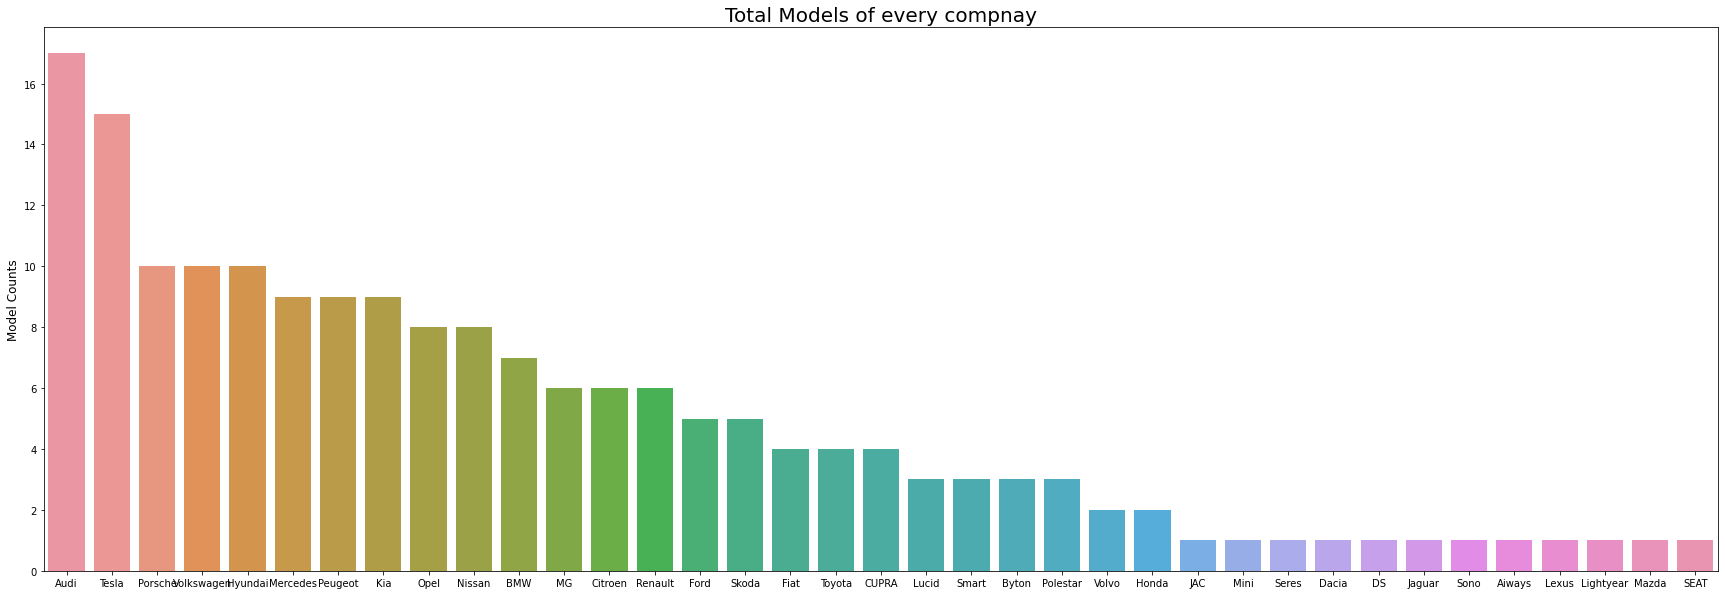

In [219]:
print("Total Models of every compnay")
ev_clean['Company'].value_counts()
plt.figure(figsize=(30,10))
sns.barplot(ev_clean['Company'].value_counts().index, ev_clean['Company'].value_counts().values)
# ev_clean['Company'].value_counts().plot(kind='bar')
plt.title('Total Models of every compnay', fontsize=20)
plt.ylabel('Model Counts', fontsize=12)
plt.show()


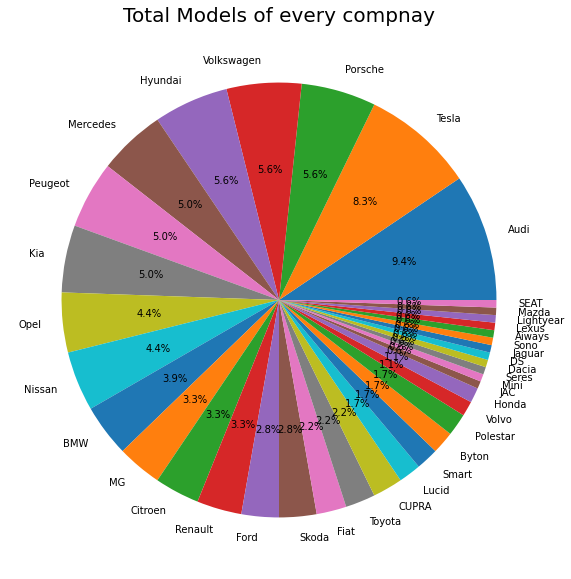

In [310]:

# sns.piechart(ev_clean['Company'].value_counts().index, ev_clean['Company'].value_counts().values)
# Total Models of every compnay in pie chart, where each company is a slice
plt.figure(figsize=(30,10))
plt.title('Total Models of every compnay', fontsize=20)

plt.pie(ev_clean['Company'].value_counts().values, labels=ev_clean['Company'].value_counts().index, autopct='%1.1f%%')
plt.show()

### We will take average of car features on the basis of Company Name. It becomes easy for analysis. These 37 rows represents 180 rows of electric cars. There might besome sharp changes in graphs due to this sampling 

In [354]:

    ev_avg = ev_clean.groupby('Company').mean()
    ev_avg
    ev_avg.shape

(37, 9)

In [227]:
ev_avg.sort_values(by='Efficiency', ascending=False)

,Battery(KWH),Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
Company,,,,,,,,,
Toyota,56.500000,12.600000,130.000000,226.250000,249.250000,267.500000,7.000000,61957.500000,0.000000
Citroen,52.666667,12.100000,133.333333,223.333333,236.666667,275.000000,6.666667,50810.000000,10481.666667
Byton,87.333333,6.833333,190.000000,371.666667,234.666667,453.333333,5.000000,59833.333333,55833.333333
Jaguar,84.700000,4.800000,200.000000,365.000000,232.000000,340.000000,5.000000,77300.000000,65195.000000
Peugeot,50.111111,11.655556,135.555556,223.888889,225.888889,284.444444,6.555556,47246.666667,24417.222222
Volvo,75.000000,4.800000,180.000000,340.000000,221.000000,440.000000,5.000000,60650.000000,53675.000000
Opel,52.375000,10.850000,137.500000,244.375000,219.125000,280.000000,6.250000,48956.250000,13393.125000
Audi,76.729412,6.300000,192.647059,359.411765,214.352941,546.470588,4.882353,63320.588235,51757.647059
Mercedes,82.400000,7.655556,173.333333,406.111111,209.555556,477.777778,5.666667,74326.222222,48875.555556


Total Models of every compnay


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


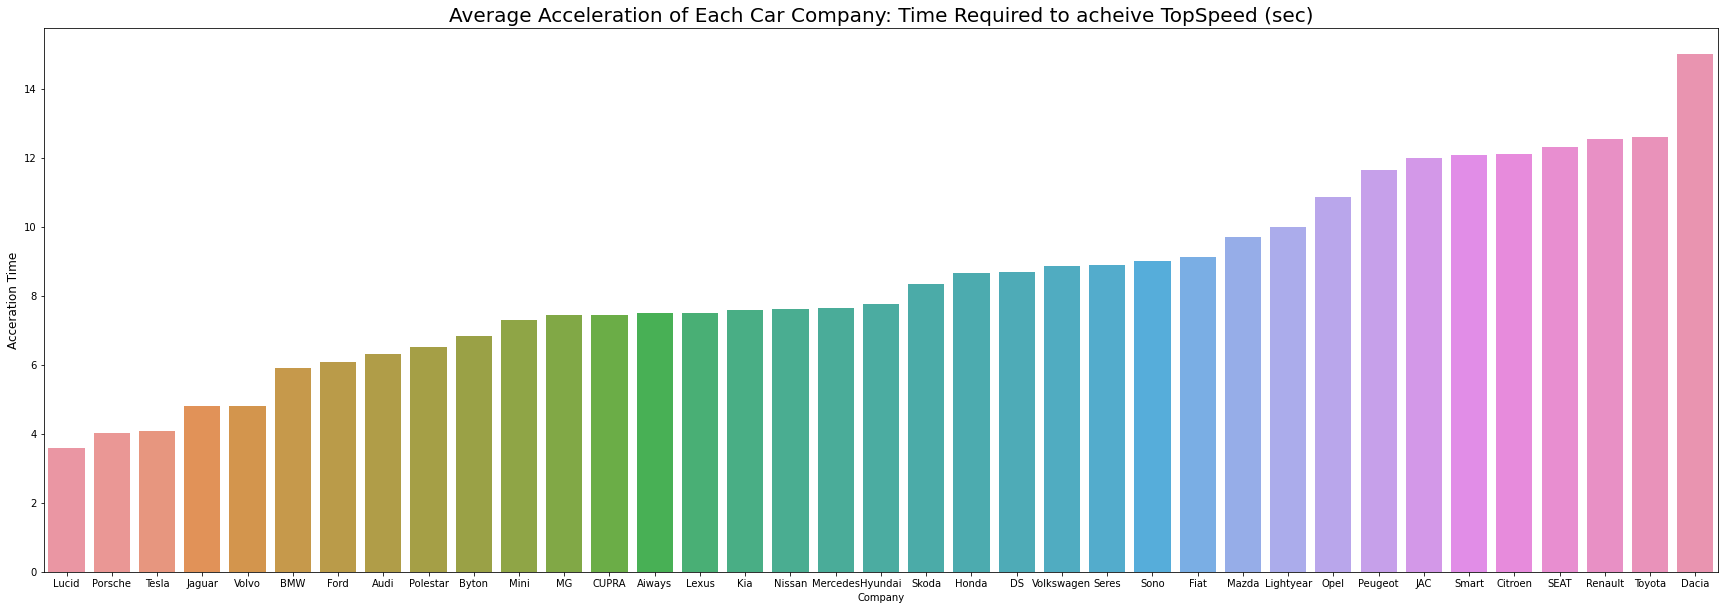

In [358]:
# ev_avg.sort_values(by='Acceleration', ascending=True)
print("Total Models of every compnay")
plt.figure(figsize=(30,10))
sns.barplot(ev_avg['Acceleration'].sort_values(ascending=True).index, ev_avg['Acceleration'].sort_values(ascending=True).values)
plt.title('Average Acceleration of Each Car Company: Time Required to acheive TopSpeed (sec)', fontsize=20)
plt.ylabel('Acceration Time', fontsize=12)
plt.show()





c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


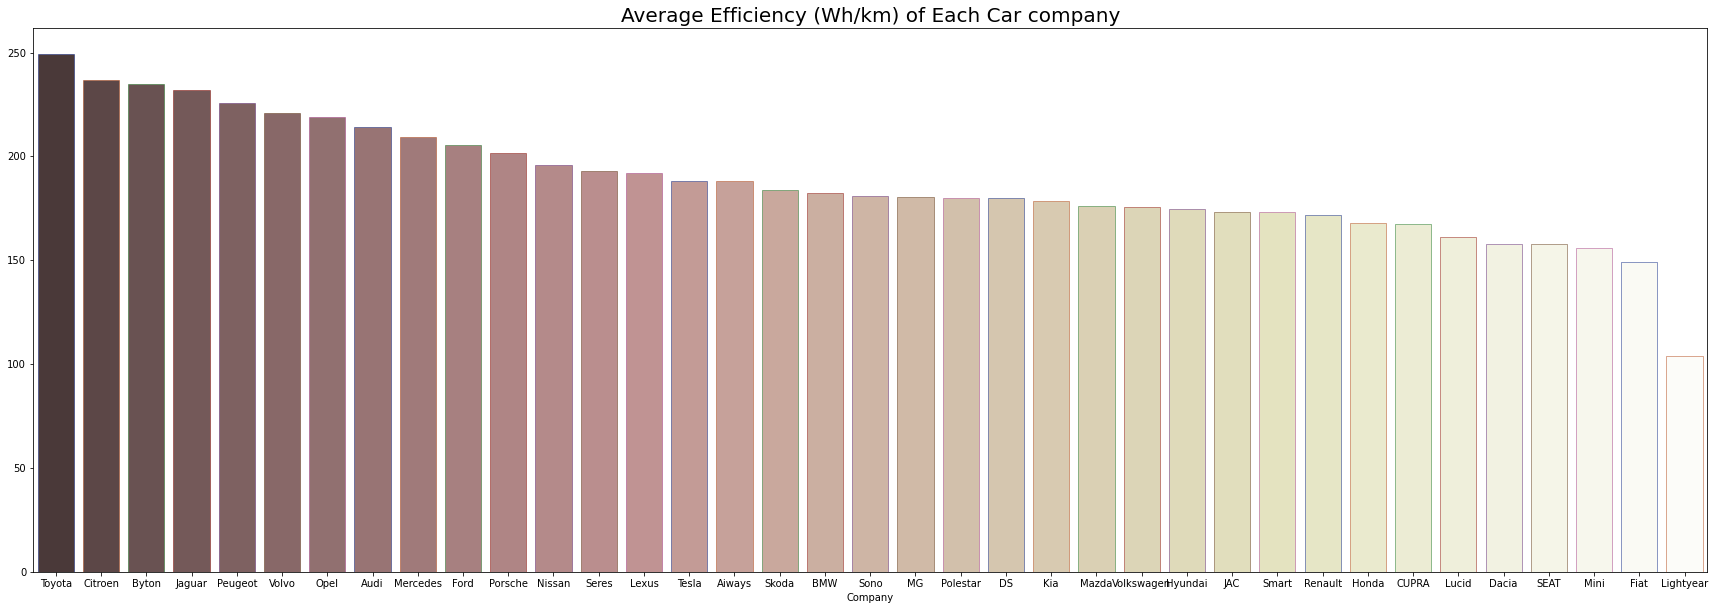

In [359]:
plt.figure(figsize=(30,10))
sns.barplot(ev_avg['Efficiency'].sort_values(ascending=False).index, ev_avg['Efficiency'].sort_values(ascending=False).values, palette='pink', edgecolor=sns.color_palette('dark', 7), linewidth=0.5, alpha=0.9)
plt.title('Average Efficiency (Wh/km) of Each Car company', fontsize=20)
# plt.ylabel('Acceration Time', fontsize=12)
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


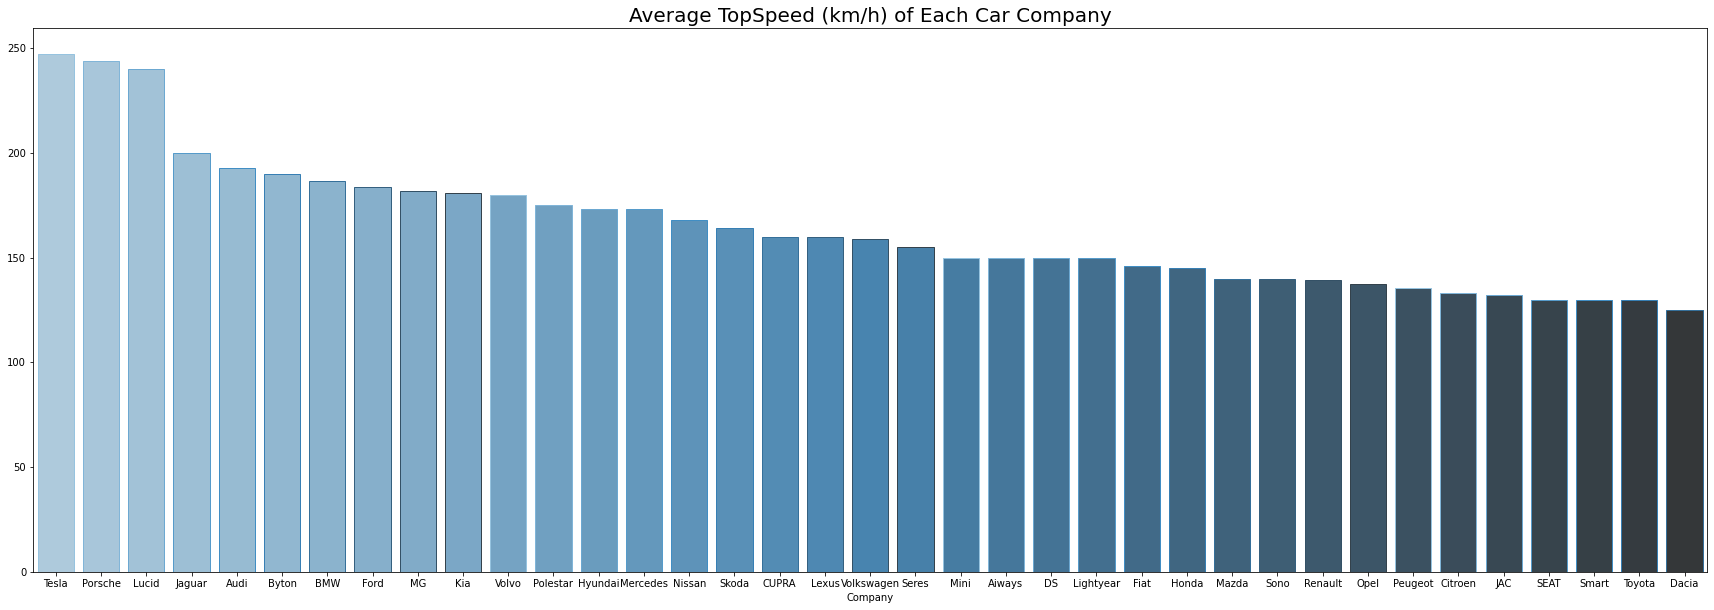

In [360]:
plt.figure(figsize=(30,10))
sns.barplot(ev_avg['TopSpeed'].sort_values(ascending=False).index, ev_avg['TopSpeed'].sort_values(ascending=False).values, palette='Blues_d', edgecolor=sns.color_palette('Blues_d', n_colors=10))
plt.title('Average TopSpeed (km/h) of Each Car Company', fontsize=20)
# plt.ylabel('Acceration Time', fontsize=12)
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


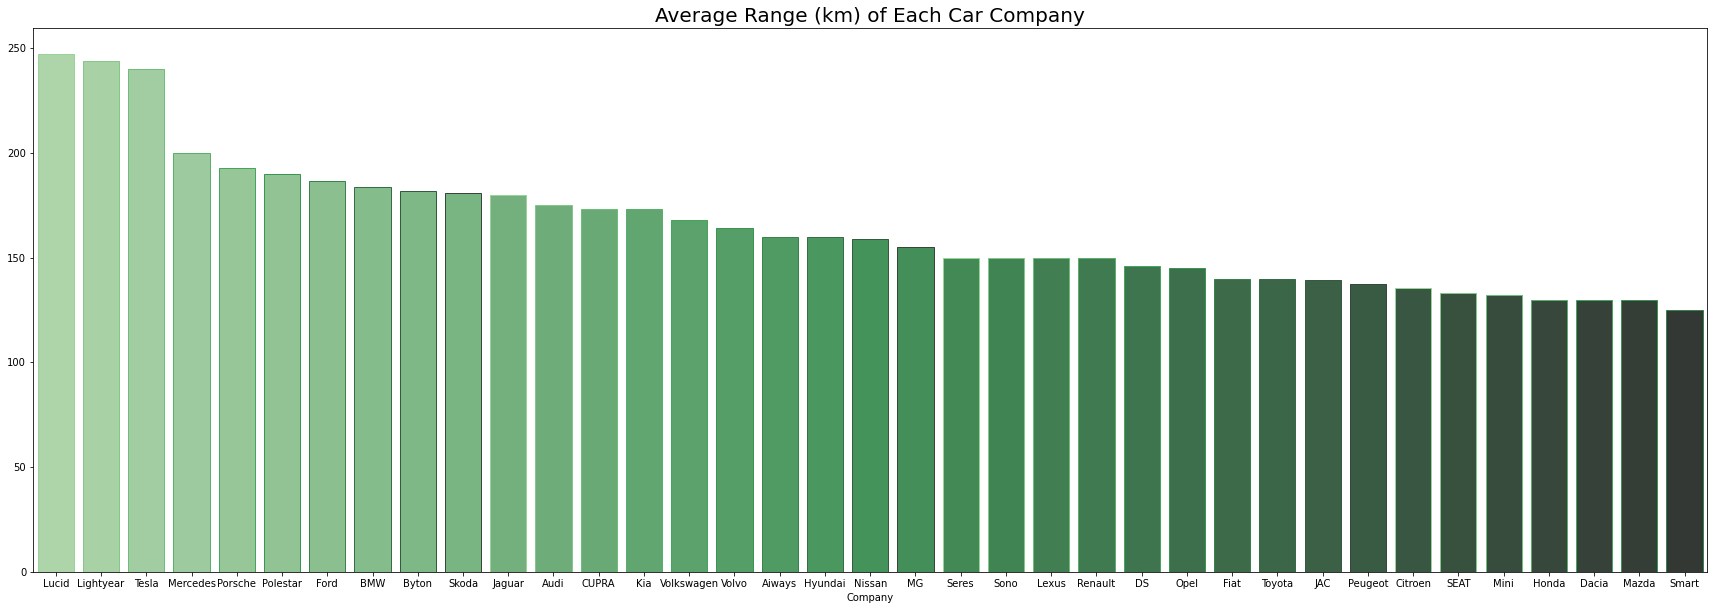

In [361]:
plt.figure(figsize=(30,10))
sns.barplot(ev_avg['Range'].sort_values(ascending=False).index, ev_avg['TopSpeed'].sort_values(ascending=False).values, palette='Greens_d', edgecolor=sns.color_palette('Greens_d', n_colors=10))
plt.title('Average Range (km) of Each Car Company', fontsize=20)
# plt.ylabel('Acceration Time', fontsize=12)
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


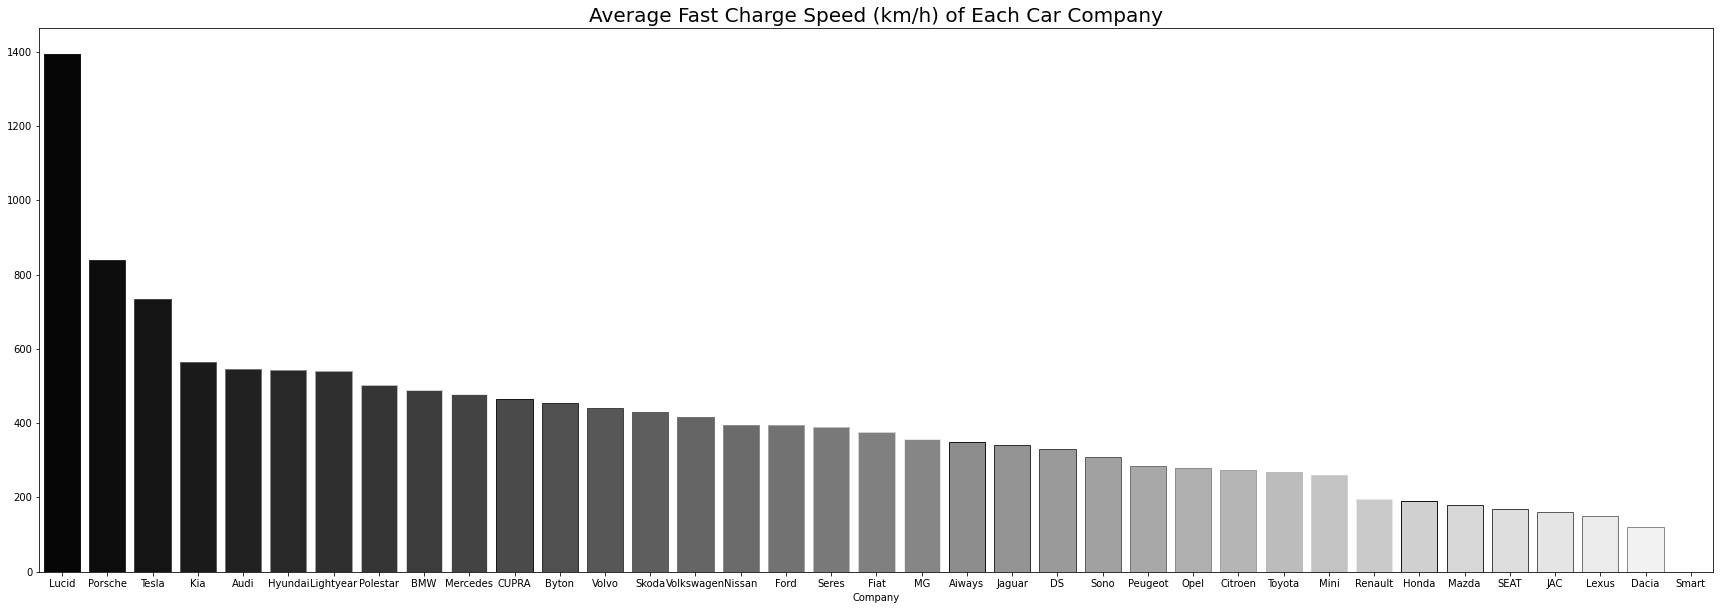

In [362]:
plt.figure(figsize=(30,10))
sns.barplot(ev_avg['FastChargeSpeed'].sort_values(ascending=False).index, ev_avg['FastChargeSpeed'].sort_values(ascending=False).values, palette='gray', edgecolor=sns.color_palette('gray', n_colors=10))
plt.title('Average Fast Charge Speed (km/h) of Each Car Company', fontsize=20)
# plt.ylabel('Acceration Time', fontsize=12)
plt.show()

In [ ]:
ev_avg['Company'=='Lucid']

Look at the percentage between different Drive types


Text(0, 0.5, 'Drive Wheels')

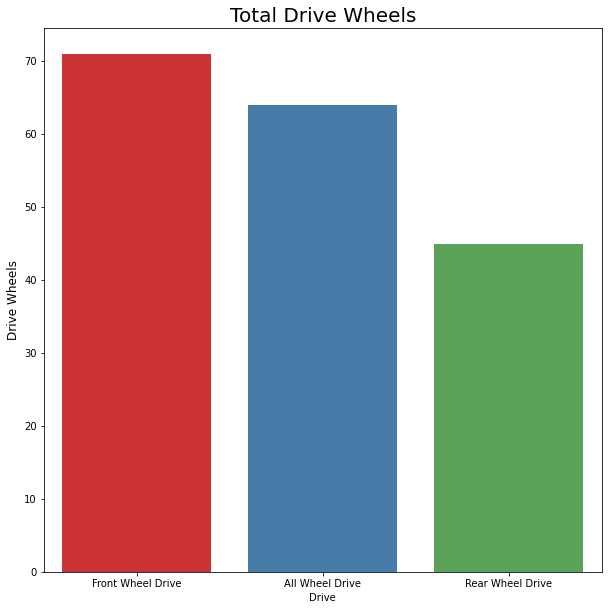

In [353]:
print("Look at the percentage between different Drive types")
plt.figure(figsize=(10,10))
sns.countplot(x='Drive', data=ev_clean, palette='Set1')
plt.title('Total Drive Wheels', fontsize=20)
plt.ylabel('Drive Wheels', fontsize=12)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


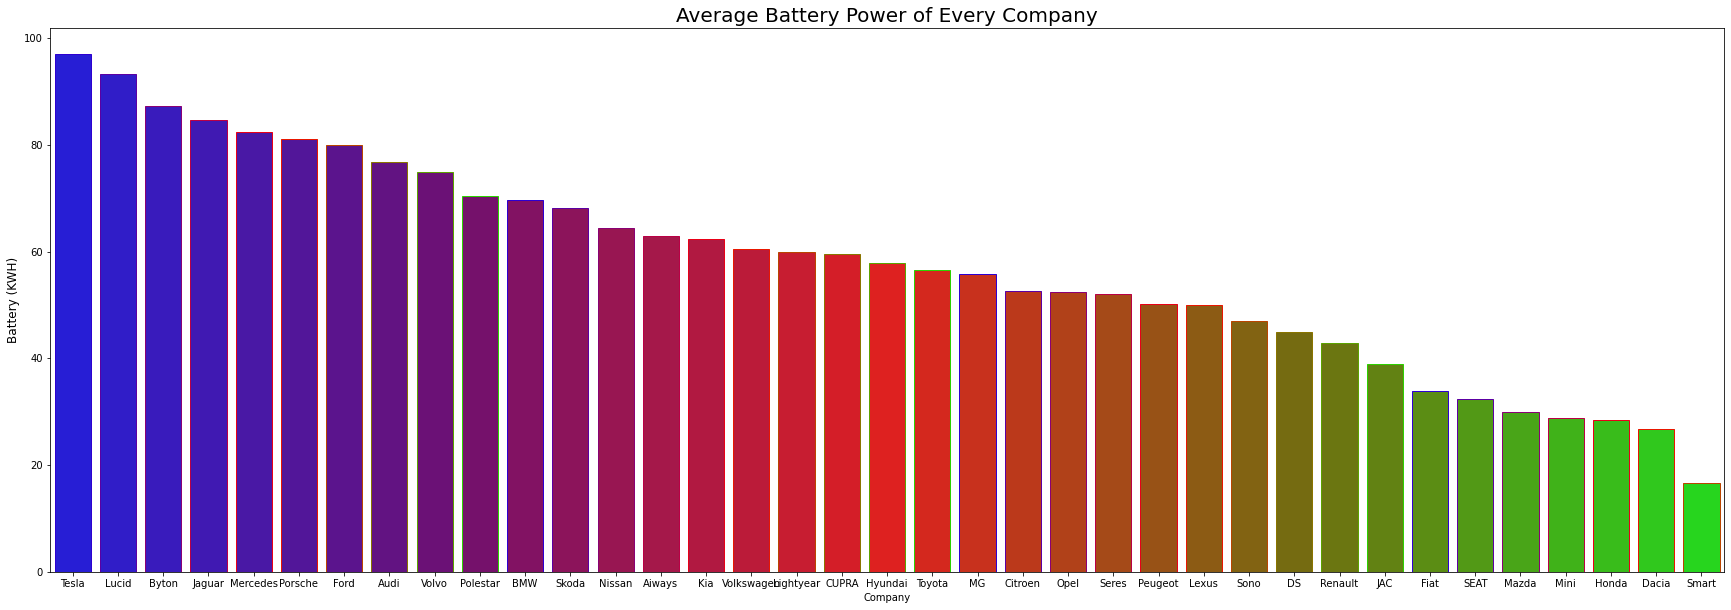

In [363]:
plt.figure(figsize=(30,10))
sns.barplot(ev_avg['Battery(KWH)'].sort_values(ascending=False).index, ev_avg['Battery(KWH)'].sort_values(ascending=False).values , palette='brg', edgecolor=sns.color_palette('brg', n_colors=10))
plt.ylabel('Battery (KWH)', fontsize=12)
plt.title('Average Battery Power of Every Company', fontsize=20)
plt.show()

## Comparison between 2 variables of Individual Electric Cars. 
- Here we use actual data not average data
- Mostly we use line plot to see trend between numeric variables

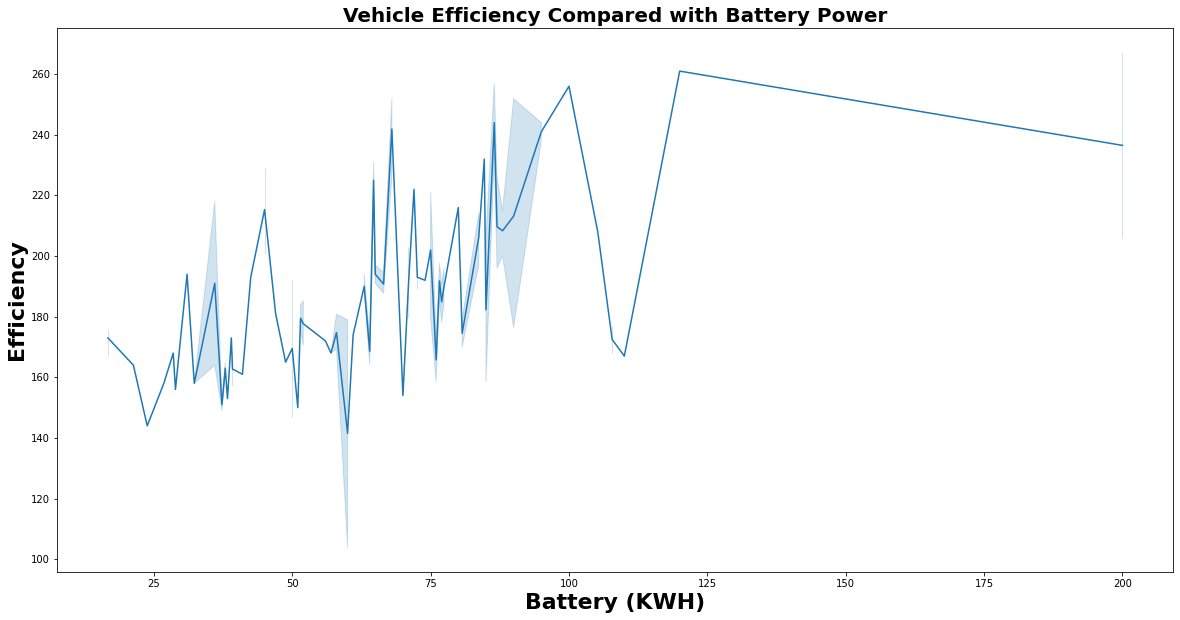

The corelation coefficient between battery and efficiency is 
 [[1.         0.40241067]
 [0.40241067 1.        ]]


In [364]:
plt.figure(figsize=(20,10))
# sns.catplot(x="Battery(KWH)",kind="bar", y="Efficiency", height=6, hue="TopSpeed", data=ev_avg)
sns.lineplot(x="Battery(KWH)", y="Efficiency", data=ev_clean,)
plt.title("Vehicle Efficiency Compared with Battery Power", fontsize=20, fontweight='bold', color='black')
plt.ylabel('Efficiency', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Battery (KWH)', fontsize=22, fontweight='bold', color='black')
plt.show()
print("The corelation coefficient between battery and efficiency is", '\n', np.corrcoef(ev_avg['Battery(KWH)'], ev_avg['Efficiency']))

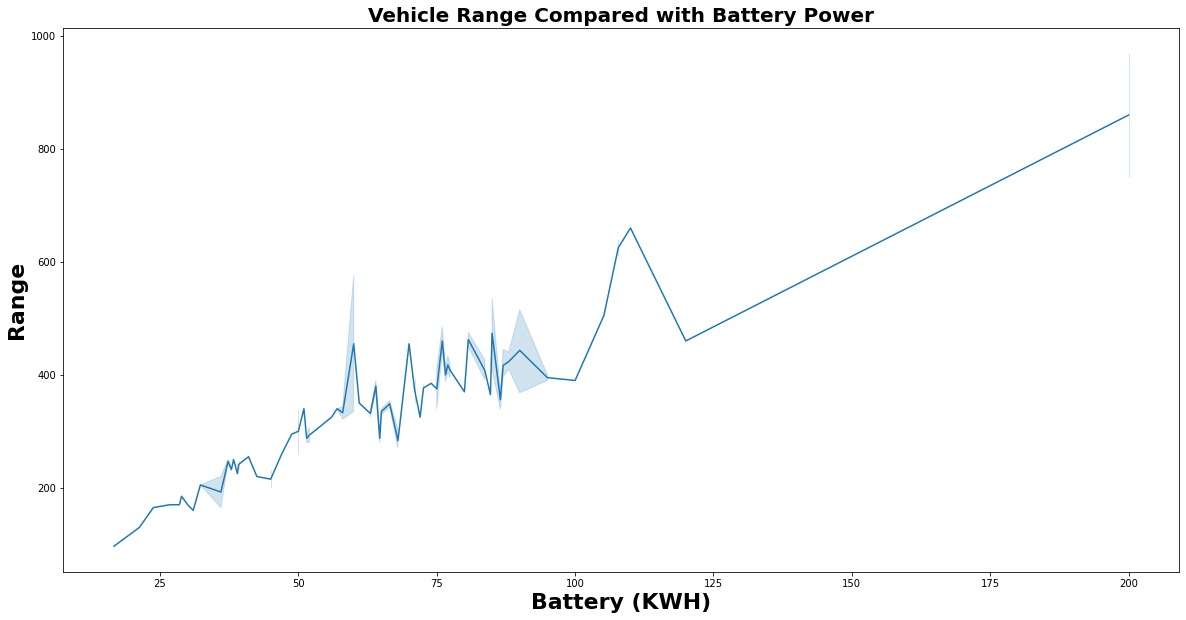

The corelation coefficient between battery and Range is 
 [[1.         0.85763776]
 [0.85763776 1.        ]]


In [365]:
plt.figure(figsize=(20,10))
# sns.catplot(x="Battery(KWH)",kind="bar", y="Efficiency", height=6, hue="TopSpeed", data=ev_avg)
sns.lineplot(x="Battery(KWH)", y="Range", data=ev_clean,)
plt.title("Vehicle Range Compared with Battery Power", fontsize=20, fontweight='bold', color='black')
plt.ylabel('Range', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Battery (KWH)', fontsize=22, fontweight='bold', color='black')
plt.show()
print("The corelation coefficient between battery and Range is", '\n', np.corrcoef(ev_avg['Battery(KWH)'], ev_avg['Range']))

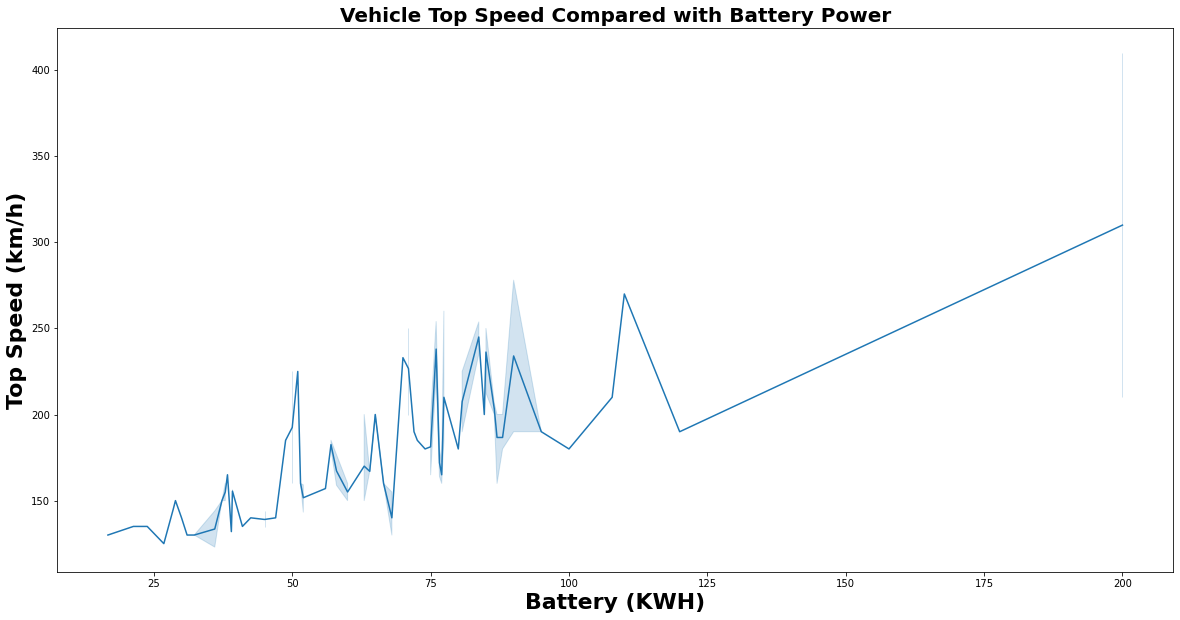

In [366]:
plt.figure(figsize=(20,10))
# sns.catplot(x="Battery(KWH)",kind="bar", y="Efficiency", height=6, hue="TopSpeed", data=ev_avg)
sns.lineplot(x="Battery(KWH)", y="TopSpeed", data=ev_clean,)
plt.title("Vehicle Top Speed Compared with Battery Power", fontsize=20, fontweight='bold', color='black')
plt.ylabel('Top Speed (km/h)', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Battery (KWH)', fontsize=22, fontweight='bold', color='black')
plt.show()

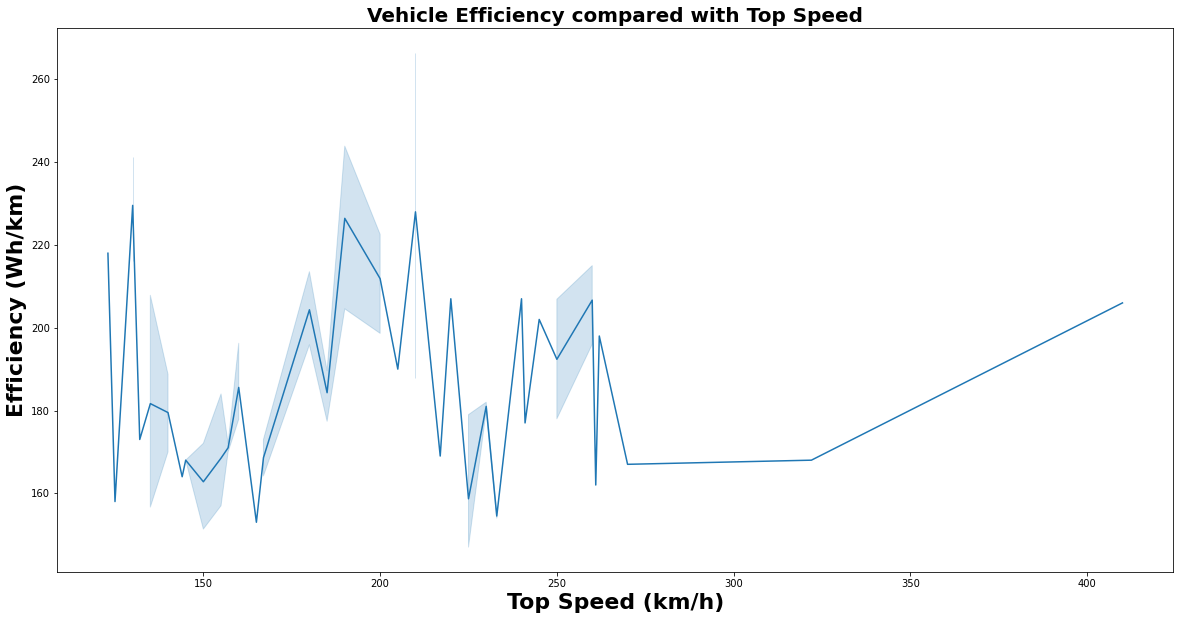

The corelation coefficient between Efficiency and top speed is 
 [[1.         0.13945713]
 [0.13945713 1.        ]]


In [367]:
plt.figure(figsize=(20,10))
# sns.catplot(x="Battery(KWH)",kind="bar", y="Efficiency", height=6, hue="TopSpeed", data=ev_avg)
sns.lineplot(x="TopSpeed", y="Efficiency", data=ev_clean,)
plt.title("Vehicle Efficiency compared with Top Speed", fontsize=20, fontweight='bold', color='black')
plt.ylabel('Efficiency (Wh/km)', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Top Speed (km/h)', fontsize=22, fontweight='bold', color='black')
plt.show()
print("The corelation coefficient between Efficiency and top speed is", '\n', np.corrcoef(ev_avg['Efficiency'], ev_avg['TopSpeed']))

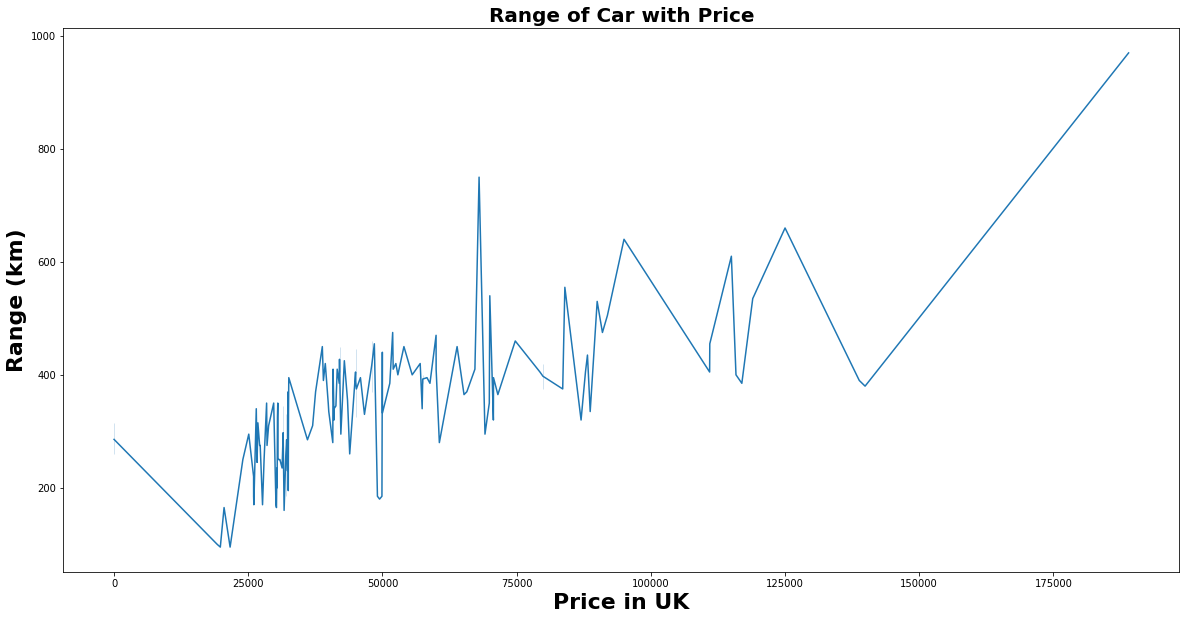

The corelation coefficient between Range and UK price is 
 [[1.         0.13945713]
 [0.13945713 1.        ]]


In [372]:
plt.figure(figsize=(20,10))
# sns.catplot(x="Battery(KWH)",kind="bar", y="Efficiency", height=6, hue="TopSpeed", data=ev_avg)
sns.lineplot(x="PriceinUK", y="Range", data=ev_clean,)
plt.title("Range of Car with Price", fontsize=20, fontweight='bold', color='black')
plt.ylabel('Range (km)', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Price in UK', fontsize=22, fontweight='bold', color='black')
plt.show()
print("The corelation coefficient between Range and UK price is", '\n', np.corrcoef(ev_avg['Efficiency'], ev_avg['TopSpeed']))

## Comparison of 3 variables, (1 categorical and 2 numerical variables)
- We ca neasily check if category is wheel drive, what is comparison between number of seats and battery KWH

<Figure size 2880x720 with 0 Axes>

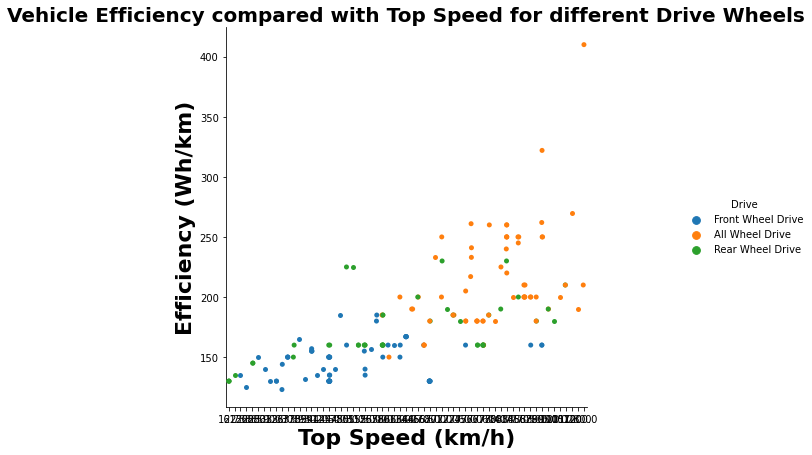

In [375]:
plt.figure(figsize=(40,10))
# sns.catplot(x="Battery(KWH)",kind="bar", y="Efficiency", height=6, hue="TopSpeed", data=ev_avg)
sns.catplot(x="Battery(KWH)", y="TopSpeed", height=6, hue="Drive", data=ev_clean)
plt.title("Vehicle Efficiency compared with Top Speed for different Drive Wheels", fontsize=20, fontweight='bold', color='black')
plt.ylabel('Efficiency (Wh/km)', fontsize=22, fontweight='bold', color='black')
plt.xlabel('Top Speed (km/h)', fontsize=22, fontweight='bold', color='black')
plt.show()


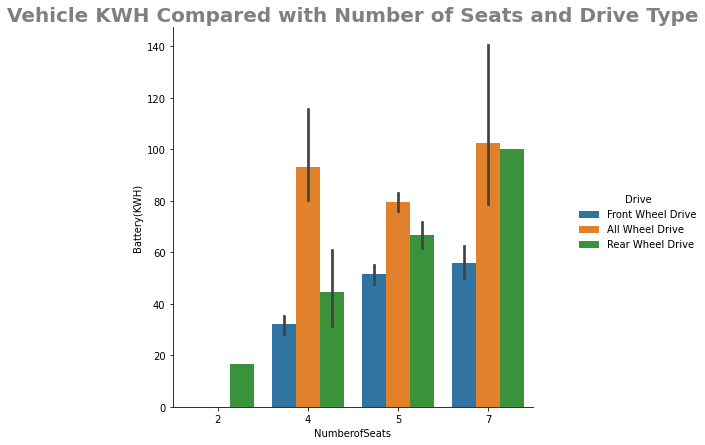

In [377]:
sns.catplot(data=ev_clean, kind="bar", x="NumberofSeats", y="Battery(KWH)",height=6, hue="Drive")
plt.title("Vehicle KWH Compared with Number of Seats and Drive Type", fontsize=20, fontweight='bold', color='grey')
plt.show()

In [381]:
# ev_clean['Drive'].count()

In [ ]:
sns.catplot(x="Battery(KWH)", y="TopSpeed", height=12, hue="Efficiency", data=ev_clean)

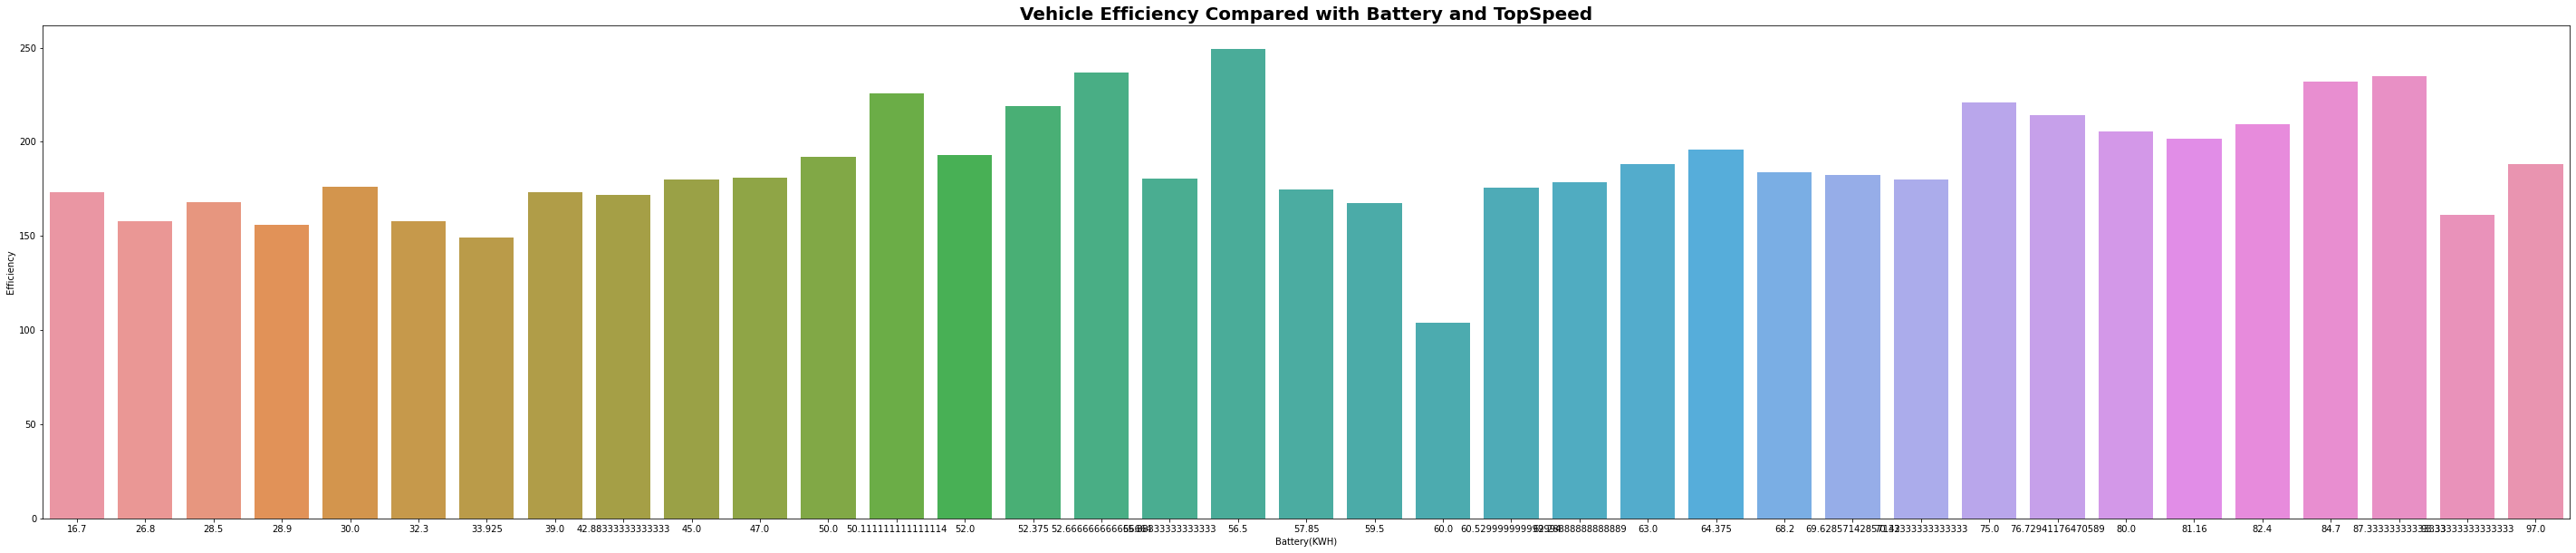

In [275]:
plt.figure(figsize=(50,10))
# sns.catplot(x="Battery(KWH)",kind="bar", y="Efficiency", height=6, hue="TopSpeed", data=ev_avg)
sns.barplot(x="Battery(KWH)", y="Efficiency", data=ev_avg)
plt.title("Vehicle Efficiency Compared with Battery and TopSpeed", fontsize=20, fontweight='bold', color='black')

plt.show()

In [ ]:
ev_clean.barplot(x='Company',y='TopSpeed',data=ev_clean,palette='Paired')

# **Machine learning Algorithms**
# Price Predictions

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=0)


In [342]:
X=ev_clean[['Acceleration','Range','TopSpeed','Efficiency']]
y=ev_clean['PriceinUK']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.6)

In [350]:
# model1 = LinearRegression(X,y,model)
# model1.fit(X, y)
# model1.predict([[6,400,300,200]])

print ("This is our correction score:")
clf = LinearRegression(normalize=True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(r2_score(Y_test,Y_pred))

This is our correction score:
0.5746788193828243


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [352]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)

# train model using training set
model.fit(X, y)
# predict using test set
pred = model.predict([[8,300,300,250]])
print(pred)
# model.score(X,y)

[50000.]


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
